### Loading data

In [1]:
import time 
import sys
import xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [2]:
X = pd.read_csv('data/train/overfeat_train_features.csv', header=None, index_col=0)
y = np.array([0 if x.startswith('cat') else 1 for x in X.index])
X_test = pd.read_csv('data/test/overfeat_test_features.csv', header=None, index_col=0)

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=3000)
print(X_train.shape, y_train.shape)
X_train.head()

((22000, 4096), (22000,))


,1,2,3,4,5,6,7,8,9,10,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,,,,,,,,,,,,,,,,,,,,,
cat.2526.jpg,0.584553,0.729148,-0.136258,-5.42511,-3.380940,-1.509520,-0.886637,0.316268,-0.904704,-4.739370,...,-1.029290,-3.10849,-5.367140,-0.673714,-3.307090,-2.12031,-1.15433,-3.28235,-4.256540,-3.961780
cat.8535.jpg,1.349980,-1.049400,-1.038460,-2.12334,-1.055460,-1.486560,0.695067,1.157750,-1.386230,-2.057630,...,-0.078132,-2.08642,-0.344660,-2.031090,-2.581280,1.29713,-2.82956,-1.39541,0.700663,-0.915354
cat.9344.jpg,0.655047,-0.255905,-0.606477,-1.40373,-2.499240,-1.437510,-1.711580,0.159415,-0.416739,0.078969,...,0.033017,-1.79220,-3.977030,-1.538780,-2.818170,-1.34778,-1.97717,-2.48982,0.102485,-2.985620
cat.12137.jpg,-0.050563,-0.478259,-1.247100,-1.44155,-2.975540,0.046482,-0.081402,0.373546,-0.645610,-1.069360,...,-0.648340,-3.03529,-0.556767,-1.561660,0.548373,-1.85041,-2.59632,-2.13929,-1.606650,-0.425182
cat.12016.jpg,-1.719080,-1.344220,0.765208,-0.05316,-0.161446,-1.013070,-0.476897,0.598665,0.177191,0.265093,...,0.007610,-2.08927,-1.931030,-1.060260,-1.999020,-1.60627,-1.54583,-2.86721,-0.455168,-1.054600


-----

### Random Forest

In [4]:
# finetuned
clf = RandomForestClassifier(
    n_estimators=120,
    max_depth=12,
    warm_start=True,
    n_jobs=4, verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=120, n_jobs=4, oob_score=False, random_state=None,
            verbose=1, warm_start=True)

In [5]:
y_pred = clf.predict(X_val)

print('Accuracy:\t%.4f' % accuracy_score(y_val, y_pred))
print('Precition:\t%.4f' % precision_score(y_val, y_pred))
print('Recall:\t\t%.4f' % recall_score(y_val, y_pred))
print('F1-score:\t%.4f' % f1_score(y_val, y_pred))

Accuracy:	0.9600
Precition:	0.9612
Recall:		0.9586
F1-score:	0.9599


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.1s finished


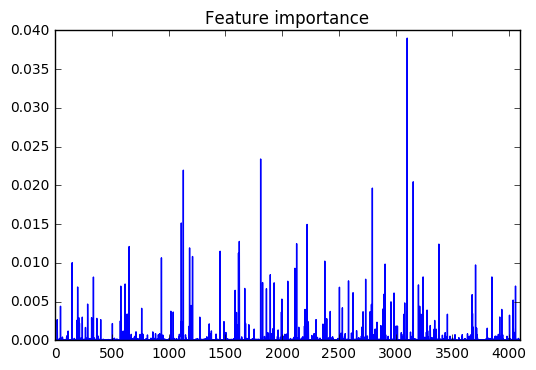

In [6]:
plt.plot(clf.feature_importances_)
plt.xlim((0, X.shape[1]))
plt.title('Feature importance');

In [ ]:
y_pred = pd.DataFrame(clf.predict(X_test), columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == 0] = 'cat'
y_pred[y_pred['label'] == 1] = 'dog'
y_pred.to_csv('overfeat_rf.csv', index_label='file')

-----

### SGD

In [13]:
# finetuned
clf = SGDClassifier(loss='hinge', penalty='l2', epsilon=1., n_jobs=4)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=1.0,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=4,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [14]:
y_pred = clf.predict(X_val)

print('Accuracy:\t%.4f' % accuracy_score(y_val, y_pred))
print('Precition:\t%.4f' % precision_score(y_val, y_pred))
print('Recall:\t\t%.4f' % recall_score(y_val, y_pred))
print('F1-score:\t%.4f' % f1_score(y_val, y_pred))

Accuracy:	0.9593
Precition:	0.9416
Recall:		0.9793
F1-score:	0.9601


In [21]:
y_pred = pd.DataFrame(clf.predict(X_test), columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == 0] = 'cat'
y_pred[y_pred['label'] == 1] = 'dog'
y_pred.to_csv('overfeat_sgd.csv', index_label='file')

-----

### Neural Network

In [15]:
import lasagne
import theano
import theano.tensor as T

from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import NonlinearityLayer
from lasagne.layers import BatchNormLayer
from lasagne.layers import DropoutLayer
from lasagne.nonlinearities import softmax, sigmoid

# finetuned
def build_model():
    net = {}
    net['input'] = InputLayer((None, 4096))
    net['fc1'] = DenseLayer(net['input'], num_units=512, nonlinearity=None)
    net['bn1'] = BatchNormLayer(net['fc1'])
    net['nl1'] = NonlinearityLayer(net['bn1'], sigmoid)
    net['fc1_dropout'] = DropoutLayer(net['nl1'], p=0.5)
    net['fc2'] = DenseLayer(net['fc1_dropout'], num_units=64, nonlinearity=None)
    net['bn2'] = BatchNormLayer(net['fc2'])
    net['nl2'] = NonlinearityLayer(net['bn2'], sigmoid)
    net['fc2_dropout'] = DropoutLayer(net['nl2'], p=0.5)
    net['fc3'] = DenseLayer(net['fc2_dropout'], num_units=2, nonlinearity=None)
    net['prob'] = NonlinearityLayer(net['fc3'], softmax)

    return net

# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X.loc[X.index[batch_idx]], Y[batch_idx]

In [16]:
input_var = T.matrix('inputs')
target_var = T.ivector('targets')
learning_rate = T.scalar(name='learning_rate')

net = build_model()

prediction = lasagne.layers.get_output(net['prob'], input_var)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var).mean()

params = lasagne.layers.get_all_params(net['prob'], trainable=True)
updates = lasagne.updates.adam(loss, params, learning_rate=learning_rate)

In [17]:
test_prediction = lasagne.layers.get_output(net['prob'], input_var, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction, target_var).mean()

test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),dtype=theano.config.floatX)

In [18]:
train_fn = theano.function([input_var, target_var, learning_rate], loss, updates=updates, allow_input_downcast=True)
val_fn = theano.function([input_var, target_var], [test_loss, test_acc], allow_input_downcast=True)
predict = theano.function([input_var], test_prediction, allow_input_downcast=True)

In [22]:
num_epochs = 30
lr = 1e-4
for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_batches = 0
    start_time = time.time()
    for batch in get_batches((X_train, y_train), 1000):
        inputs, targets = batch
        train_err += train_fn(inputs, targets, lr)
        train_batches += 1
        sys.stdout.flush()
    
    # And a full pass over the validation data:
    val_err = 0
    val_acc = 0
    val_batches = 0
    for batch in get_batches((X_val, y_val), 500):
        inputs, targets = batch
        err, acc = val_fn(inputs, targets)
        val_err += err
        val_acc += acc
        val_batches += 1

#     # Then we print the results for this epoch:
#     if epoch % 5 == 0: 
    print("\nEpoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))
    print("  loss:\t\t\t{:.6f},{:.6f}".format(train_err / train_batches, val_err / val_batches))
    print("  validation accuracy:\t\t{:.2f} %".format(
        val_acc / val_batches * 100))
    sys.stdout.flush()

......................
Epoch 1 of 30 took 13.113s
  loss:			0.306904,0.198864
  validation accuracy:		95.20 %
......................
Epoch 2 of 30 took 13.490s
  loss:			0.281077,0.191247
  validation accuracy:		95.27 %
......................
Epoch 3 of 30 took 12.822s
  loss:			0.265656,0.174888
  validation accuracy:		96.40 %
......................
Epoch 4 of 30 took 14.179s
  loss:			0.254754,0.171000
  validation accuracy:		96.30 %
......................
Epoch 5 of 30 took 15.692s
  loss:			0.243652,0.163958
  validation accuracy:		96.50 %
......................
Epoch 6 of 30 took 15.107s
  loss:			0.239188,0.160070
  validation accuracy:		96.57 %
......................
Epoch 7 of 30 took 18.591s
  loss:			0.225252,0.157616
  validation accuracy:		96.57 %
......................
Epoch 8 of 30 took 16.594s
  loss:			0.221901,0.154929
  validation accuracy:		96.67 %
......................
Epoch 9 of 30 took 15.271s
  loss:			0.215861,0.150613
  validation accuracy:		96.70 %
..........

In [23]:
y_true, y_pred = [], []
for batch in get_batches((X_train, y_train), 500):
    inputs, targets = batch
    y_pred.extend((predict(inputs)[:,1] > 0.5).astype(int))
    y_true.extend(targets)
print('Train: %.4f %.4f %.4f %.4f' %\
      (accuracy_score(y_true, y_pred),\
       precision_score(y_true, y_pred),\
       recall_score(y_true, y_pred),\
       f1_score(y_true, y_pred)))

y_true, y_pred = [], []
for batch in get_batches((X_val, y_val), 500):
    inputs, targets = batch
    y_pred.extend((predict(inputs)[:,1] > 0.5).astype(int))
    y_true.extend(targets)
    
print('Valid: %.4f %.4f %.4f %.4f' %\
      (accuracy_score(y_true, y_pred),\
       precision_score(y_true, y_pred),\
       recall_score(y_true, y_pred),\
       f1_score(y_true, y_pred)))

Train: 0.9729 0.9772 0.9685 0.9728
Valid: 0.9677 0.9717 0.9633 0.9675


In [ ]:
y_pred = pd.DataFrame(predict(X_test)[:,1] > 0.5, columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == False] = 'cat'
y_pred[y_pred['label'] == True] = 'dog'
y_pred.to_csv('overfeat_nn.csv', index_label='file')

-----

### XGBoost

In [4]:
# finetuned
clf = xgboost.XGBClassifier(
        max_depth=5, 
        subsample=0.8,
        colsample_bytree = 0.8,
        n_estimators=175,
        objective='binary:logistic')
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, n_estimators=175, nthread=-1,
       objective='binary:logistic', seed=0, silent=True, subsample=0.8)

In [5]:
y_pred = clf.predict(X_val)

print('Accuracy:\t%.4f' % accuracy_score(y_val, y_pred))
print('Precition:\t%.4f' % precision_score(y_val, y_pred))
print('Recall:\t\t%.4f' % recall_score(y_val, y_pred))
print('F1-score:\t%.4f' % f1_score(y_val, y_pred))

Accuracy:	0.9663
Precition:	0.9695
Recall:		0.9638
F1-score:	0.9667


In [11]:
y_pred = pd.DataFrame(clf.predict(X_test), columns=['label'], index=X_test.index)
y_pred[y_pred['label'] == 0] = 'cat'
y_pred[y_pred['label'] == 1] = 'dog'
y_pred.to_csv('overfeat_xgbst.csv', index_label='file')